In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns
import os

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
myworkingdirectory = r"C:\Users\eric.englin\Desktop\TSP" 
os.chdir(myworkingdirectory)

In [9]:
crash_df = pd.read_csv("./crash_data_joined.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
crash_df['CRASH_DATE']=pd.to_datetime(crash_df['CRASH_DATE'])
crash_df['day_of_week'] = crash_df['CRASH_DATE'].dt.day_name
crash_df['year'] = crash_df['CRASH_DATE'].dt.year

In [11]:
crash_df = crash_df.loc[crash_df['year']<2021]
crash_df = crash_df.loc[crash_df['year']>1989]

In [12]:
crash_df.head()

,INCID_NO,CASENUM,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,LONGITUDE,FATALS,INJURED,Data_Origin,UNIT_NAME,REGION,UNIT_TYPE,_merge,day_of_week,year
0,ABLI9000000001,0,0.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both,<bound method PandasDelegate._add_delegate_acc...,1990.0
1,ABLI9100000001,0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both,<bound method PandasDelegate._add_delegate_acc...,1991.0
2,ACAD0000000003,0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0
3,ACAD0000000014,0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0
4,ACAD0000000026,0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0


In [18]:
crash_df['FatInj']= crash_df['FATALS']+crash_df['INJURED']

In [19]:
crash_df_YELL = crash_df.loc[crash_df['PARK_ALPHA']=="YELL"]
crash_df_YELL = crash_df_YELL.loc[crash_df_YELL['FatInj']>0]
crash_df_YELL.shape

(1488, 36)

In [20]:
crash_df_YELL.INJURED.sum(), crash_df_YELL.FATALS.sum(), 

(2165.0, 53.0)

In [28]:
crash_df_YELL_year = crash_df_YELL.groupby("year").sum()
crash_df_YELL_year = crash_df_YELL_year.reset_index()

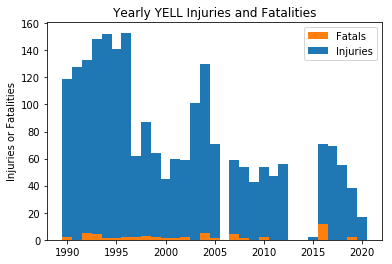

In [30]:
import numpy as np
import matplotlib.pyplot as plt


width = 1       # the width of the bars: can also be len(x) sequence

p2 = plt.bar(crash_df_YELL_year['year'], crash_df_YELL_year['INJURED'], width,
             bottom=crash_df_YELL_year['FATALS'])

p1 = plt.bar(crash_df_YELL_year['year'], crash_df_YELL_year['FATALS'], width)

plt.ylabel('Injuries or Fatalities')
plt.title('Yearly YELL Injuries and Fatalities')
plt.legend((p1[0], p2[0]), ('Fatals', 'Injuries'))

plt.show()